# Homework part I

The first problem set contains basic tasks in PyTorch.

__Note:__ Instead of doing this part of homework, you can prove your skills otherwise:
* A commit to PyTorch or PyTorch-based repos will do;
* Fully implemented seminar assignment in tensorflow or theano will do;
* Your own project in PyTorch that is developed to a state in which a normal human can understand and appreciate what it does.

In [21]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import torch, torch.nn as nn
import torch.nn.functional as F
print(torch.__version__)

2.1.1+cpu


### Task I - tensormancy

![img](https://media.giphy.com/media/3o751UMCYtSrRAFRFC/giphy.gif)

When dealing with more complex stuff like neural network, it's best if you use tensors the way samurai uses his sword. 


__1.1 The Cannabola__
[(_disclaimer_)](https://gist.githubusercontent.com/justheuristic/e2c1fa28ca02670cabc42cacf3902796/raw/fd3d935cef63a01b85ed2790b5c11c370245cbd7/stddisclaimer.h)

Let's write another function, this time in polar coordinates:
$$\rho(\theta) = (1 + 0.9 \cdot cos (8 \cdot \theta) ) \cdot (1 + 0.1 \cdot cos(24 \cdot \theta)) \cdot (0.9 + 0.05 \cdot cos(200 \cdot \theta)) \cdot (1 + sin(\theta))$$


Then convert it into cartesian coordinates ([howto](http://www.mathsisfun.com/polar-cartesian-coordinates.html)) and plot the results.

Use torch tensors only: no lists, loops, numpy arrays, etc.

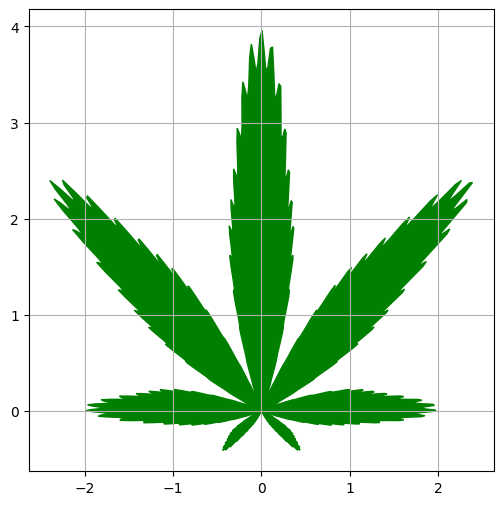

In [2]:
theta = torch.linspace(-np.pi, np.pi, steps=1000)

# compute rho(theta) as per formula above
rho = (1 + 0.9*torch.cos(8*theta))*(1+0.1*torch.cos(24*theta))*(0.9 + 0.05 *torch.cos(200*theta))*(1 + torch.sin(theta))

# Now convert polar (rho, theta) pairs into cartesian (x,y) to plot them.
x = rho*torch.cos(theta)
y = rho*torch.sin(theta)


plt.figure(figsize=[6, 6])
plt.fill(x.numpy(), y.numpy(), color='green')
plt.grid()

### Task II: The Game of Life

Now it's time for you to make something more challenging. We'll implement Conway's [Game of Life](http://web.stanford.edu/~cdebs/GameOfLife/) in _pure PyTorch_.

While this is still a toy task, implementing game of life this way has one cool benefit: __you'll be able to run it on GPU!__ Indeed, what could be a better use of your GPU than simulating Game of Life on 1M/1M grids?

![img](https://cdn.tutsplus.com/gamedev/authors/legacy/Stephane%20Beniak/2012/09/11/Preview_Image.png)
If you've skipped the URL above out of sloth, here's the Game of Life:
* You have a 2D grid of cells, where each cell is "alive"(1) or "dead"(0)
* Any living cell that has 2 or 3 neighbors survives, else it dies [0,1 or 4+ neighbors]
* Any cell with exactly 3 neighbors becomes alive (if it was dead)

For this task, you are given a reference NumPy implementation that you must convert to PyTorch.
_[NumPy code inspired by: https://github.com/rougier/numpy-100]_


__Note:__ You can find convolution in `torch.nn.functional.conv2d(Z,filters)`. Note that it has a different input format.

__Note 2:__ From the mathematical standpoint, PyTorch convolution is actually cross-correlation. Those two are very similar operations. More info: [video tutorial](https://www.youtube.com/watch?v=C3EEy8adxvc), [scipy functions review](http://programmerz.ru/questions/26903/2d-convolution-in-python-similar-to-matlabs-conv2-question), [stack overflow source](https://stackoverflow.com/questions/31139977/comparing-matlabs-conv2-with-scipys-convolve2d).

In [3]:
from scipy.signal import correlate2d

def np_update(Z):
    # Count neighbours with convolution
    filters = np.array([[1, 1, 1],
                        [1, 0, 1],
                        [1, 1, 1]])

    N = correlate2d(Z, filters, mode='same')

    # Apply rules
    birth = (N == 3) & (Z == 0)
    survive = ((N == 2) | (N == 3)) & (Z == 1)

    Z[:] = birth | survive
    return Z

In [4]:
def torch_update(Z):
    """
    Implement an update function that does to Z exactly the same as np_update.
    :param Z: torch.FloatTensor of shape [height,width] containing 0s(dead) an 1s(alive)
    :returns: torch.FloatTensor Z after updates.
    
    You can opt to create new tensor or change Z inplace.
    """
    
    Z = torch.unsqueeze(Z, dim=0)
    Z = torch.unsqueeze(Z, dim=0)
    
    filters = torch.Tensor([[1, 1, 1],
                            [1, 0, 1],
                            [1, 1, 1]])
    
    
    filters = torch.unsqueeze(filters, dim=0)
    filters = torch.unsqueeze(filters, dim=0)
    
    N = F.conv2d(Z, filters, padding=1)
    N = torch.squeeze(N)
    
    birth = (N == 3) & (Z == 0)
    survive = ((N == 2) | (N == 3)) & (Z == 1)
    
    Z[:] = birth | survive
    
    Z = torch.squeeze(Z)
    return Z


In [5]:
# initial frame
Z_numpy = np.random.choice([0, 1], p=(0.5, 0.5), size=(100, 100))
Z = torch.from_numpy(Z_numpy).type(torch.FloatTensor)

# your debug polygon :)
Z_new = torch_update(Z.clone())

# tests
Z_reference = np_update(Z_numpy.copy())
assert np.all(Z_new.numpy() == Z_reference), \
    "your PyTorch implementation doesn't match np_update. Look into Z and np_update(ZZ) to investigate."
print("Well done!")

Well done!


C:\Users\amm19\AppData\Local\Temp\ipykernel_7840\1286615333.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


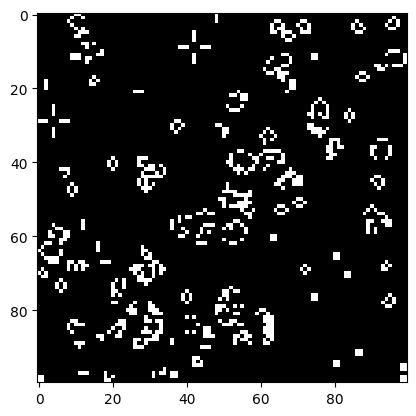

In [6]:
#%matplotlib notebook
plt.ion()

# initialize game field
Z = np.random.choice([0, 1], size=(100, 100))
Z = torch.from_numpy(Z).type(torch.FloatTensor)

fig = plt.figure()
ax = fig.add_subplot(111)
fig.show()

for _ in range(100):
    # update
    Z = torch_update(Z)

    # re-draw image
    ax.clear()
    ax.imshow(Z.numpy(), cmap='gray')
    fig.canvas.draw()

C:\Users\amm19\AppData\Local\Temp\ipykernel_7840\2483044044.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


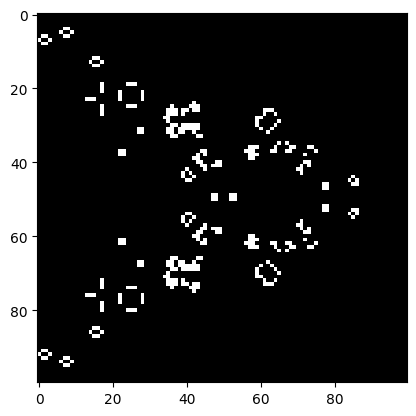

In [7]:
# Some fun setups for your amusement

# parallel stripes
Z = np.arange(100) % 2 + np.zeros([100, 100])
# with a small imperfection
Z[48:52, 50] = 1

Z = torch.from_numpy(Z).type(torch.FloatTensor)

fig = plt.figure()
ax = fig.add_subplot(111)
fig.show()

for _ in range(100):
    Z = torch_update(Z)
    ax.clear()
    ax.imshow(Z.numpy(), cmap='gray')
    fig.canvas.draw()

More fun with Game of Life: [video](https://www.youtube.com/watch?v=C2vgICfQawE) and/or [Jupyter Notebook](https://nbviewer.jupyter.org/url/norvig.com/ipython/Life.ipynb)

### Task III: Going deeper
<img src="http://download.gamezone.com/uploads/image/data/1190338/article_post_width_a88.jpg" width=360>

Your third trial is to build your first neural network [almost] from scratch and pure PyTorch.

This time you will solve yet another digit recognition problem, but at a greater scale

* 10 different letters
* 20k samples

We want you to build a network that reaches at least 80% accuracy and has at least 2 linear layers in it. Naturally, it should be nonlinear to beat logistic regression.


With 10 classes you will need to use __Softmax__ at the top instead of sigmoid and train using __categorical crossentropy__ .  Write your own loss or use `torch.nn.functional.nll_loss`. Just make sure you understand what it accepts as input.

Note that you are not required to build 152-layer monsters here. A 2-layer (one hidden, one output) neural network should already give you an edge over logistic regression.


__[bonus kudos]__
If you've already beaten logistic regression with a two-layer net, but enthusiasm still ain't gone, you can try improving the test accuracy even further! It should be possible to reach 90% without convnets.

__SPOILERS!__
At the end of the notebook you will find a few tips and frequent errors.
If you feel confident enough, just start coding right away and get there ~~if~~ once you need to untangle yourself.

In [8]:
!wget -q https://raw.githubusercontent.com/yandexdataschool/Practical_DL/fall21/week02_autodiff/notmnist.py

"wget" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.


In [9]:
from notmnist import load_notmnist
X_train, y_train, X_test, y_test = load_notmnist(letters='ABCDEFGHIJ')
X_train, X_test = X_train.reshape([-1, 784]), X_test.reshape([-1, 784])

Parsing...
found broken img: ./notMNIST_small\A\RGVtb2NyYXRpY2FCb2xkT2xkc3R5bGUgQm9sZC50dGY=.png [it's ok if <10 images are broken]
found broken img: ./notMNIST_small\F\Q3Jvc3NvdmVyIEJvbGRPYmxpcXVlLnR0Zg==.png [it's ok if <10 images are broken]
Done


In [50]:
print(type(X_train))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


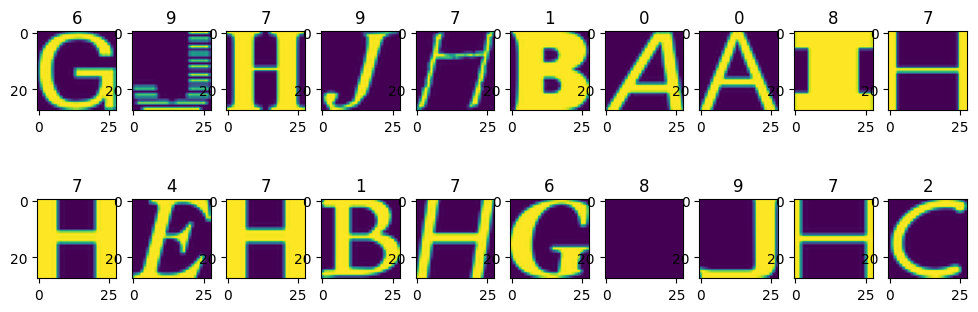

In [10]:
%matplotlib inline
plt.figure(figsize=[12, 4])
for i in range(20):
    plt.subplot(2, 10, i+1)
    plt.imshow(X_train[i].reshape([28, 28]))
    plt.title(str(y_train[i]))

In [26]:
from torch.utils.data import DataLoader, Dataset
import torchmetrics
from torchmetrics import Accuracy

In [121]:
print(X_test.shape)

(4681, 784)
6


In [80]:
BATCH_SIZE = 32
device = "cuda" if torch.cuda.is_available() else "cpu"

In [122]:
class NotMNISTDataset(Dataset):
    def __init__(self, data, labels, letter_sequence):
        self.data = data
        self.labels = labels
        self.classes = {i: letter_sequence[i] for i in range(len(letter_sequence))}
    def __len__(self):
        return len(self.data)
    def __getitem__(self, index):
        x = self.data[index]
        y = self.labels[index]
        return x, y

In [125]:
train_set = NotMNISTDataset(data=torch.from_numpy(X_train),
                            labels=torch.from_numpy(y_train).type(torch.LongTensor),
                            letter_sequence='ABCDEFGHIJ')
train_dataloader = DataLoader(dataset=train_set,
                              batch_size=BATCH_SIZE,
                              shuffle=True)
test_set = NotMNISTDataset(data=torch.from_numpy(X_test),
                           labels=torch.from_numpy(y_test).type(torch.LongTensor),
                           letter_sequence='ABCDEFGHIJ')
test_dataloader = DataLoader(dataset=test_set,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

In [126]:
print(train_set.classes)

{0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J'}


In [83]:
print(next(iter(train_dataloader))[0].shape)
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader:  {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader:  {len(test_dataloader)} batches of {BATCH_SIZE}")

torch.Size([32, 784])
DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x0000016E76E7B550>, <torch.utils.data.dataloader.DataLoader object at 0x0000016E6C8B7810>)
Length of train dataloader:  439 batches of 32
Length of test dataloader:  147 batches of 32


In [116]:
class NotMNISTModel(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block = nn.Sequential(
            nn.Linear(in_features=input_shape,
                      out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units,
                      out_features=output_shape)
        )
    def forward(self, x):
        return self.block(x)
torch.manual_seed(42)
model = NotMNISTModel(input_shape=784,
                      hidden_units= 18,
                      output_shape=10)

In [117]:

def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn: torchmetrics.Accuracy,
               device: torch.device = device):
    train_loss, train_acc = 0, 0 
    model.to(device)
    for batch, (X, y) in enumerate(data_loader):
        X, y = X.to(device), y.to(device)
        # 1.Forward pass
        y_pred = model(X)
        
        # 2.Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_pred.argmax(dim=1), y)
        
        # 3.Optimizer zero grad
        optimizer.zero_grad()
        
        # 4.Loss backward
        loss.backward()
        
        # 5.Optimizer step
        optimizer.step()
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f}| Train accuracy: {train_acc:.2f}%")
def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn: torch.nn.Module,
              device: torch.device = device):
    test_loss, test_acc = 0, 0 
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            X, y = X.to(device), y.to(device)
            
            test_pred = model(X)
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(test_pred.argmax(dim=1), y)
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f}| Test accuracy: {test_acc:.2f}%")

In [118]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model.parameters(),
                            lr = 0.01)
accuracy_fn = Accuracy(task="multiclass", num_classes=10).to(device)

In [119]:
torch.manual_seed(42)
from tqdm.auto import tqdm
from timeit import default_timer as timer
# Measure time
train_time_start = timer()

#Train and test model
epochs = 10
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-----------")
    train_step(data_loader=train_dataloader,
               model = model,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device
            )
    test_step(data_loader=test_dataloader,
              model = model,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0
-----------
Train loss: 0.91610| Train accuracy: 0.77%
Test loss: 0.49415| Test accuracy: 0.87%
Epoch: 1
-----------
Train loss: 0.46404| Train accuracy: 0.87%
Test loss: 0.42052| Test accuracy: 0.88%
Epoch: 2
-----------
Train loss: 0.40789| Train accuracy: 0.88%
Test loss: 0.39101| Test accuracy: 0.89%
Epoch: 3
-----------
Train loss: 0.37849| Train accuracy: 0.89%
Test loss: 0.37496| Test accuracy: 0.89%
Epoch: 4
-----------
Train loss: 0.35837| Train accuracy: 0.90%
Test loss: 0.36774| Test accuracy: 0.89%
Epoch: 5
-----------
Train loss: 0.34336| Train accuracy: 0.90%
Test loss: 0.35886| Test accuracy: 0.90%
Epoch: 6
-----------
Train loss: 0.33138| Train accuracy: 0.91%
Test loss: 0.35153| Test accuracy: 0.90%
Epoch: 7
-----------
Train loss: 0.32078| Train accuracy: 0.91%
Test loss: 0.34726| Test accuracy: 0.90%
Epoch: 8
-----------
Train loss: 0.31194| Train accuracy: 0.91%
Test loss: 0.34344| Test accuracy: 0.90%
Epoch: 9
-----------
Train loss: 0.30366| Train accurac

In [120]:
def make_predictions(model:torch.nn.Module,
                     data: list,
                     device: torch.device = device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            
            # Forward pass (model outputs raw logit)
            pred_logit = model(sample)
            
            # Get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit, dim=0)
            
            pred_probs.append(pred_prob)
    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs) 
            

In [ ]:
import random
class_names = train_set.classes
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_set))

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

# SPOILERS!

Recommended pipeline:

* Adapt logistic regression from seminar assignment to classify one letter against others (e.g. A vs the rest)
* Generalize it to multiclass logistic regression.
  - Either try to remember lecture 0 or google it.
  - Instead of weight vector you'll have to use matrix (feature_id x class_id)
  - Softmax (exp over sum of exps) can be implemented manually or as `nn.Softmax` (layer) or `F.softmax` (function)
  - Probably better to use STOCHASTIC gradient descent (minibatch) for greater speed
    - You can also try momentum/rmsprop/adawhatever
    - in which case the dataset should probably be shuffled (or use random subsamples on each iteration)
* Add a hidden layer. Now your logistic regression uses hidden neurons instead of inputs.
  - Hidden layer uses the same math as output layer (ex-logistic regression), but uses some nonlinearity (e.g. sigmoid) instead of softmax
  - You need to train both layers, not just the output layer :)
  - 50 hidden neurons and a sigmoid nonlinearity will do for a start. Many ways to improve.
  - In ideal case this totals to 2 `torch.matmul`'s, 1 softmax and 1 ReLU/sigmoid
  - __Make sure this neural network works better than logistic regression!__

* Now's the time to try improving the network. Consider layers (size, neuron count), nonlinearities, optimization methods, initialization — whatever you want, but please avoid convolutions for now.

* If anything seems wrong, try going through one step of training and printing everything you compute.
* If you see NaNs midway through optimization, you can estimate $\log P(y \mid x)$ as `F.log_softmax(layer_before_softmax)`.